**STQD6324 Data Management**

Matric Number : P146217
Name: Ahmad Nazmi bin Zayuri

***1. Introduction***

Global greenhouse gas (GHG) emissions have long been the central indicator of progress of countries and region which is showed in their steps to address climate change. These emissions, driven primarily by fossil fuel combustion, industrial processes, agriculture, and land-use changes that indicate the progress of countries, continue to warm the planet and cause widespread environmental disruption (IPCC, 2021, p. 5). Analysing historical GHG data at both the global and country levels provide valuable insights into the drivers of emissions and the effectiveness of climate action. This can also help other countries to imitates or uses successful countries as guidelines and model to be used for other countries. Thus, this report explores trends in GHG emissions between 1990 and 2021, using graphical visualizations to highlight both global patterns and contributions by key countries.


***2. Problem Statement***

GHG levels remain high even after numerous ongoing climate summits, treaties, and emissions-reduction pledges. Thus, there is a need to:

•	Understand the global emission trends

•	Identify major emitting countries and track their historical contributions

•	Assess how global crises and policies influence emission trajectories

This report studies the temporal patterns and key factors of global and country-level GHG emissions from 1990 to 2021.


***3. Data Collection***

The Greenhouse Gas (GHG) Inventory Data contains the most recently submitted information, covering the period from 1990 to the latest available year, to the extent the data have been provided. The GHG data contain information on anthropogenic emissions by sources and removals by sinks of the following GHGs (carbon dioxide (CO2), methane (CH4), nitrous oxide (N2O), hydrofluorocarbons (HFCs), perfluorocarbons (PFCs), unspecified mix of HFCs and PFCs, sulphur hexafluoride (SF6) and nitrogen triflouride (NF3)) that are not controlled by the Montreal Protocol.


This report will focus on emission for carbon dioxide (CO2) and the process is done using Hadoop System (Apache Hive) for data preprocessing and python in vs code for process of data cleaning and visualisation. his data is gotten from UNData website for Greenhouse Gas (GHGs) Emissions without Land Use, Land-Use Change and Forestry (LULUCF), in kilotonne CO2 equivalent with the link:
https://data.un.org/Data.aspx?d=GHG&f=seriesID%3aGHG 
https://github.com/AhmadNazmiZayuri/DataManagement/blob/main/UNdata_Export.csv


The data consist of three column of country, year and value which is in kilotonne CO2 for GHG Emissions.

***4.0 Data preprocessing***

In this stage, the apache hive was used for preprocessing such as creating a DataFrame.

In [17]:
#Installing necesary packages
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for data visualization
import matplotlib.ticker as ticker #for data visualization
import pandas as pd
from impala.dbapi import connect #connecting with Apache Hive



In [13]:
# Establish connection
conn = connect(
    host='127.0.0.1',
    port=10000,
    user='maria_dev',
    database='default',
    auth_mechanism='PLAIN'
)
#Display available table
cursor = conn.cursor()
cursor.execute('SHOW TABLES')
print(cursor.fetchall())

[('gt_2015',), ('undata_export',)]


In [14]:
#Query the necessary table
cursor1 = conn.cursor()
cursor1.execute("SELECT * FROM undata_export")
rows = cursor1.fetchall()
print(rows)

[('Australia', 2020, 528149.456399617), ('Australia', 2019, 546606.624341056), ('Australia', 2018, 552484.024716441), ('Australia', 2017, 550874.867938502), ('Australia', 2016, 543976.812336764), ('Australia', 2015, 534936.016961654), ('Australia', 2014, 526711.779998652), ('Australia', 2013, 532267.334867726), ('Australia', 2012, 541899.740302483), ('Australia', 2011, 538663.87777036), ('Australia', 2010, 536893.737804177), ('Australia', 2009, 541475.792467023), ('Australia', 2008, 538590.714122566), ('Australia', 2007, 535807.551620325), ('Australia', 2006, 529240.641214476), ('Australia', 2005, 524811.845283562), ('Australia', 2004, 518408.437662019), ('Australia', 2003, 501128.976318902), ('Australia', 2002, 501000.842687318), ('Australia', 2001, 497352.025386861), ('Australia', 2000, 489528.649319222), ('Australia', 1999, 478136.874727016), ('Australia', 1998, 472145.831804056), ('Australia', 1997, 457864.510418591), ('Australia', 1996, 445847.225288782), ('Australia', 1995, 43926

In [15]:
#Get column names
cursor2 = conn.cursor()
cursor2.execute("DESCRIBE undata_export")
columns = [col[0] for col in cursor2.fetchall()]
print(columns)

['country', 'year', 'value']


In [18]:
#Convert to DataFrame
df = pd.DataFrame(rows, columns=columns)
print(df.head())

     country    year          value
0  Australia  2020.0  528149.456400
1  Australia  2019.0  546606.624341
2  Australia  2018.0  552484.024716
3  Australia  2017.0  550874.867939
4  Australia  2016.0  543976.812337


**4.1. Data Cleaning**

In [19]:
# 1. Check which rows have invalid years
print(df[df['year'].isna() | ~df['year'].apply(lambda x: pd.notna(x) and pd.notnull(x) and pd.api.types.is_number(x))])

     country  year  value
1375           NaN    NaN


In [20]:
# 2. Drop rows where 'year' is NaN or not a finite number
df = df[pd.to_numeric(df['year'], errors='coerce').notnull()]

In [21]:
# 3. Convert year to integer
df['year'] = df['year'].astype(int)

In [22]:
# 4. Reset index starting from 1
df.index = range(1, len(df) + 1)

In [23]:
# 5.Round the 'value' column to 3 decimal places
df['value'] = df['value'].round(0)


In [24]:
# Summary of missing values per column
print(df.isna().sum())


country    0
year       0
value      0
dtype: int64


In [ ]:
# Preview cleaned data
print(df)

                       country  year      value
1                    Australia  2020   528149.0
2                    Australia  2019   546607.0
3                    Australia  2018   552484.0
4                    Australia  2017   550875.0
5                    Australia  2016   543977.0
...                        ...   ...        ...
1371  United States of America  1994  6745167.0
1372  United States of America  1993  6639526.0
1373  United States of America  1992  6534880.0
1374  United States of America  1991  6418406.0
1375  United States of America  1990  6487331.0

[1375 rows x 3 columns]


**4.2. Data Analyzing**

In [26]:
#Check Unique Countries
print(df['country'].unique()) #Print specific unique countries
print(df['country'].nunique())  # Number of countries


['Australia' 'Austria' 'Belarus' 'Belgium' 'Bulgaria' 'Canada' 'Croatia'
 'Cyprus' 'Czechia' 'Denmark' 'Estonia' 'European Union' 'Finland'
 'France' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Japan'
 'Latvia' 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Malta' 'Monaco'
 'Netherlands (Kingdom of the)' 'New Zealand' 'Norway' 'Poland' 'Portugal'
 'Romania' 'Russian Federation' 'Slovakia' 'Slovenia' 'Spain' 'Sweden'
 'Switzerland' 'Türkiye' 'Ukraine' 'United Kingdom'
 'United States of America']
43


The list of countries include countries from Europe, Ocenia (Australia, New Zealand), Japan and North America which is Canada and United States of America. However, Europe Union is also included in the list of specific countries which consist of all europe countries in union for economical and poltical benefits. With EU in the data, certain europe countries will have double emission thus can affect visualisation and analyzing. Thus, we can remove EU from the dataset for a complete analyzing.

In [27]:
#Droping EU from dataset
df_no_eu = df[df['country'] != 'European Union']

In [28]:
#Checking summary of dataset
print(df_no_eu.describe())


              year         value
count  1343.000000  1.343000e+03
mean   2005.488459  4.181525e+05
std       9.230270  1.097103e+06
min    1990.000000  7.000000e+01
25%    1997.500000  2.754250e+04
50%    2005.000000  7.851100e+04
75%    2013.000000  4.084470e+05
max    2021.000000  7.511448e+06


In [29]:
#Top 10 countries with highest total comission
top_emitters = df_no_eu.groupby('country')['value'].sum().sort_values(ascending=False).head(10)
print(top_emitters)


country
United States of America    221302279.0
Russian Federation           67532972.0
Japan                        42321012.0
Germany                      31729372.0
Canada                       22079094.0
United Kingdom               20745828.0
France                       16417974.0
Italy                        16408903.0
Australia                    15546090.0
Ukraine                      15145447.0
Name: value, dtype: float64


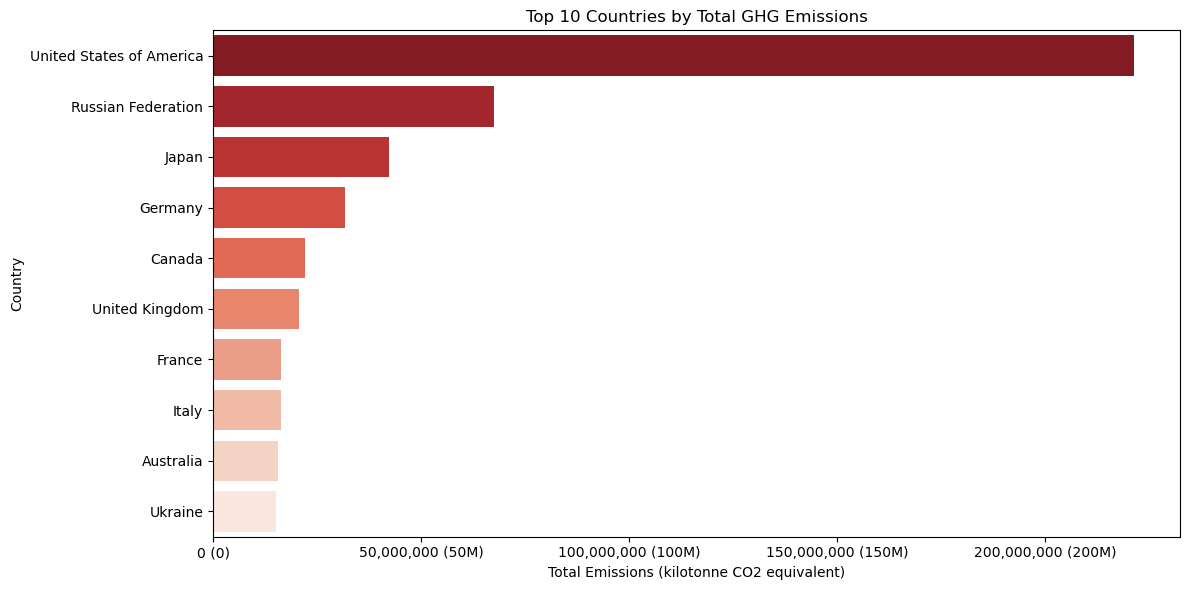

In [30]:
#Bar Chart of Top 10 countries in total emission

#Defining value threshold for better visaulisation
def custom_label(x, pos):
    if x >= 1e9:
        suffix = f"{x/1e9:.0f}B"
    elif x >= 1e6:
        suffix = f"{x/1e6:.0f}M"
    elif x >= 1e3:
        suffix = f"{x/1e3:.0f}K"
    else:
        suffix = f"{x:.0f}"
    return f"{int(x):,} ({suffix})"

plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_emitters.values,
    y=top_emitters.index,
    hue=top_emitters.index,
    palette="Reds_r",
    legend=False
)

plt.title("Top 10 Countries by Total GHG Emissions")
plt.xlabel("Total Emissions (kilotonne CO2 equivalent)")
plt.ylabel("Country")

# Apply custom x-axis formatter
formatter = ticker.FuncFormatter(custom_label)
plt.gca().xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()


**Top 10 Countries by Total GHG Emissions (Bar Chart)**

This bar chart visualizes the total cumulative greenhouse gas (GHG) emissions for the top 10 emitting countries over 1990 to 2021. The emissions are measured in kilotonnes of CO₂ equivalent. We can see which countries that have higher emissions compared to other countries. However, this data and graph does not include China and India, which is among the leading countries in industrial production (National Bureau of Statistics of China (2025), Press Trust of India(2025)).

The United States is the top emitter in the dataset, with total emissions exceeding 200 million kilotonnes of CO₂ equivalent (ktCO₂e). This is caused by the legacy of
industrialization, high per capita energy consumption, and historical fossil fuel dominance of the country. The EPA (2023, p. ES-5) identifies energy generation, transportation, and industry as the major sources of US emissions. While steps such as renewable adoption and regulation have lowered emissions in recent years, total historic emissions are still higher than ever.

Russia is the second-largest emitter on this graph. One of its primary sources of emissions is a fossil fueled, carbon intensive energy system, as well as their history and
legacy of previous Soviet industrial era. Economic breakdown in 1990 causes lower emissions, which recovered in the 2000s (UNFCCC, 2005, p.2). Its large absolute emissions reflect the history of fossil fuel production, previous industrial era and energy inefficiency.

Japan ranks third, which is quite high emissions throughout the time span but is still low compared to US and Russia. Emissions remained high due to limited domestic fossil
fuel resources, resulting in extensive imports and burning. The 2011 Fukushima tragedy caused a shift away from nuclear energy, resulting in a temporary increase in fossil fuel use before efficiency and renewability measures were implemented (OECD, 2015, p.94).

Despite being one of the leading polluters from the graph, Germany has consistently reduced its emissions. This accomplishment is mainly because of the Energiewende program,
which eliminated nuclear power while encouraging renewables and energy efficiency across the country (Agora Energiewinde, 2020, p. 10). Germany's cumulative emissions are significant because of its status as Europe's industrial powerhouse and its legacy.

For Canada and the United Kingdom, both countries have medium level total emissions that can be seen from the graph. Canada's emissions are dominated by the oil sands and
transportation sectors, whereas the UK has seen reductions due to coal phaseout and growing usage of wind power (BEIS, 2022, p. 7).

France's emissions are relatively low for an industrialized nation. This can be said because of the country reliance on nuclear power, which generates approximately 70% of
its electricity with minimal direct CO₂ emissions (IEA, 2022, p. 41).

Australia's emissions, while lower in overall, are significant per capita due to its coal-dependent energy industry and emissions from land use and agriculture (Australian
Government, 2022, p. 12).

From the graph, we can conclude that the size of the country, the type of the country for example an industrial country and the historical legacy of the country plays a major role in its emission of CO2.


REFERENCES

Agora Energiewende. (2020). The German Energiewende in Practice: Successes and Challenges. Retrieved from https://www.agora-energiewende.de (p. 10).

Australian Government. (2022). Australia’s National Greenhouse Accounts. Department of Climate Change, Energy, the Environment and Water. (p. 12).

BEIS. (2022). UK Greenhouse Gas Emissions Statistics. Department for Business, Energy & Industrial Strategy. (p. 7).

EPA. (2023). Inventory of U.S. Greenhouse Gas Emissions and Sinks: 1990–2021. Environmental Protection Agency. (p. ES-5).

IEA. (2022). France 2022: Energy Policy Review. International Energy Agency. (p. 41).

OECD. (2015). Aligning Policies for a Low-carbon Economy. OECD Publishing. (p. 94).

UNFCCC. (2005). Russian Federation: Initial National Communication. United Nations Framework Convention on Climate Change. (p. 2).

National Bureau of Statistics of China. (2025, January 17). China’s industrial production sees accelerated growth in 2024. The State Council of the People’s Republic of China. https://english.www.gov.cn/archive/statistics/202501/17/content_WS678a18b6c6d0868f4e8eee90.html

Press Trust of India. (2025, January 10). India’s industrial growth reaches 5.2% in November 2024. DD News. https://ddnews.gov.in/en/indias-industrial-growth-reaches-5-2-in-november-2024/

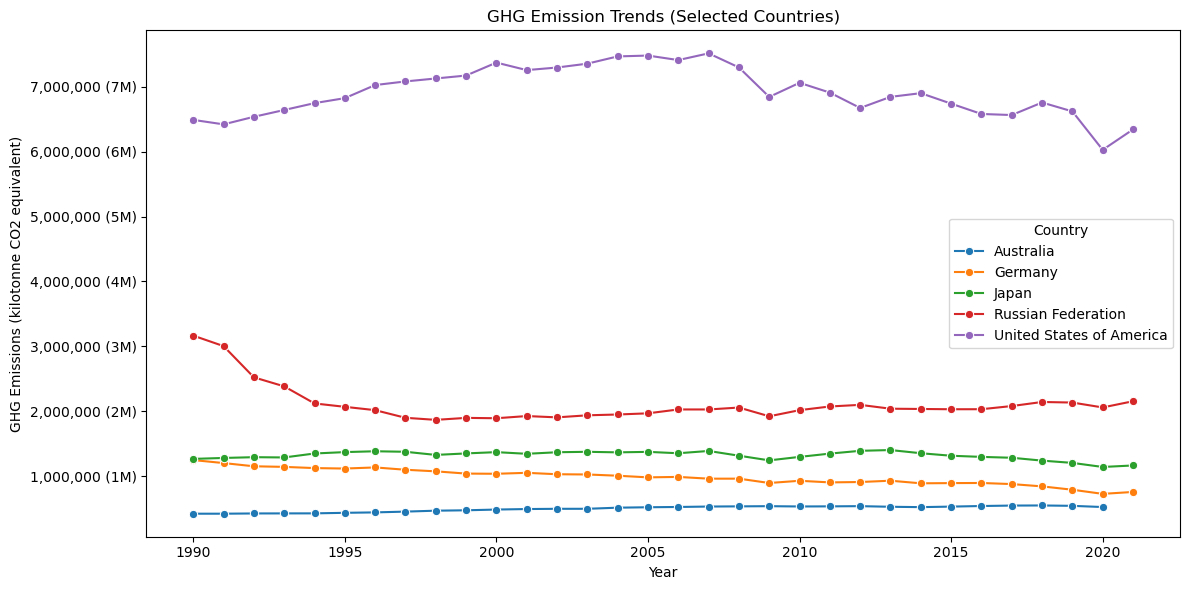

In [ ]:
#Line Chart of Selected Countries
#Trend emission by country
selected = ['Russian Federation', 'United States of America', 'Japan', 'Germany', 'Australia']
filtered_df = df[df['country'].isin(selected)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x='year', y='value', hue='country', marker='o')
plt.title('GHG Emission Trends (Selected Countries)')
plt.xlabel('Year')
plt.ylabel('GHG Emissions (kilotonne CO2 equivalent)')
plt.legend(title='Country')
formatter = ticker.FuncFormatter(custom_label)
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()


**Line Chart of Selected Countries**

This line chart tracks the annual GHG emissions (in kilotonnes of CO₂ equivalent) from 1990 to 2021 for five countries: United States of America (US), Russian Federation, Japan, Germany, and Australia. The five countries were chosen as US and Russia is the top two countries from the data set, Japan as the one and only Asian Representative, Germany as a country from Europe with a status as an industrial powerhouse and Australia as a representative of Oceania. This offers a comparative view of emission patterns over three decades for those selected countries.
    
The United States always has the highest emissions. Emissions steadily grew from 1990 to 2007, peaking at approximately 7 million kt CO₂e. Since 2007, a dramatic reduction
has been recorded, particularly between 2008 and 2012, due to factors such as the 2008 financial crisis, fuel switching from coal to natural gas, and increased adoption of renewable energy (EPA, 2023, p. 4).
    
The Russian Federation, on the other hand, began emitting over 3 million kt CO2e in 1990 but experienced a steep drop in the early 1990s. The abrupt decrease coincides with
the post-Soviet industrial crisis. Emissions remained stable after the mid-1990s, with minor oscillations and a tiny rise after 2010 due to increased energy exports and industrial re-growth (UNFCCC, 2005, p. 3).

Next, Japan's emissions are very stable, varying between 1.2 and 1.4 million kt CO2e. After 2011, there was a steep increase in dependency on fossil fuels because of the
Fukushima nuclear disaster (IEA, 2016, p. 33). After that, Japan experiences a slow drop as it works to improve energy efficiency and address climate change.
    
After that, Germany has a continuous decline pattern, falling from approximately 1.2 million kt CO2e in 1990 to less than 800,000 kt CO2e in 2021. It is linked to coal 
phase-out, renewable energy expansion, and stringent EU climate policies (Agora Energiewende, 2020, p.12).

Finally, Australia's emissions have gradually increased from 1990 to the mid-2000s. The level of emissions remains stable at roughly 500,000 kt CO2e at the end of graph, 
with little volatility. Coal, transportation, and land use emissions continue to contribute to Australia's high per capita emissions (Department of Climate Change, 2022, p. 5).

While the United States and Russia have the largest overall emissions, their declines since the mid-2000s have been the most substantial. The US especially can be seen more volatile with their trend of emission. Germany's steady decline is the most consistent in the developed nations. Japan and Australia represent policy and sourcing tendencies. This graph effectively illustrates how national policies, energy mix, and economic change influence GHG trajectories where certain big countries showing a downward trend after improving on their renewable energy adaption while some countries shown an increasing trend as  they slowly increase their industrial sector.


REFERENCES

Agora Energiewende. (2020). The German Energiewende in Practice. (p. 12)

Department of Climate Change. (2022). Australia’s National Inventory Report. (p. 5)

EPA. (2023). Inventory of U.S. Greenhouse Gas Emissions and Sinks: 1990–2021. (p. 4)

IEA. (2016). Japan 2016: Energy Policy Review. (p. 33)

UNFCCC. (2005). Russian Federation National Communication. (p. 3)

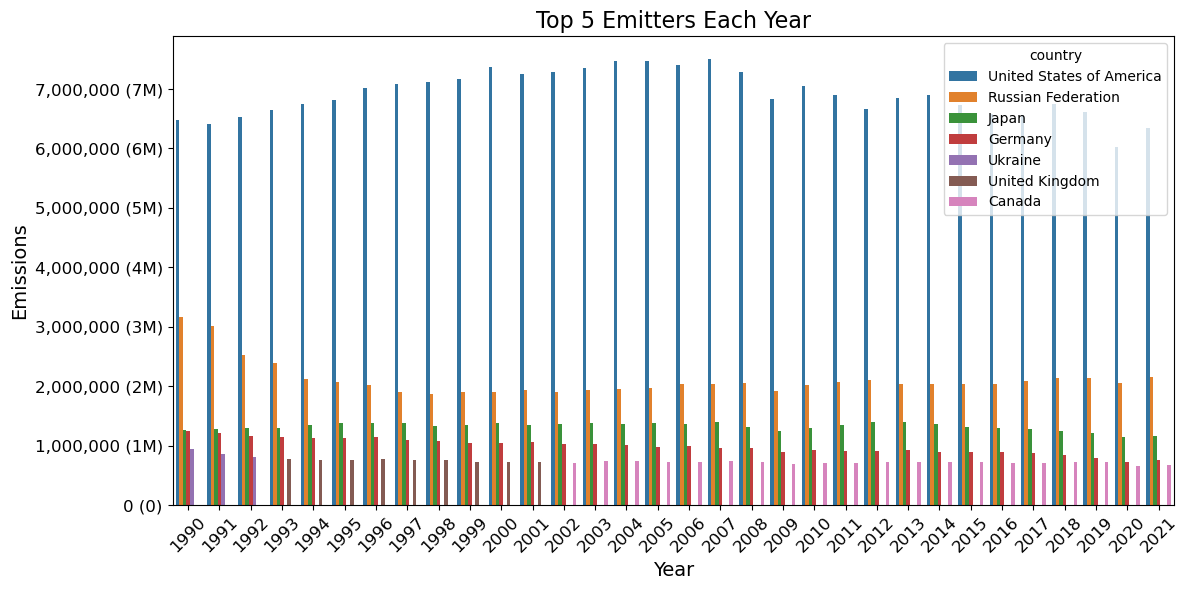

In [ ]:
#Top 5 Emitters Each Year (Grouped Bar Chart or Facet)
top_n = 5
top_emitters_per_year = df_no_eu.groupby(['year']).apply(
    lambda x: x.nlargest(top_n, 'value')).reset_index(drop=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_emitters_per_year, x='year', y='value', hue='country')

plt.title(f"Top {top_n} Emitters Each Year", fontsize=16)
plt.xlabel("Year", fontsize=14)  # Clearer label and larger font
plt.ylabel("Emissions", fontsize=14)  # Optional: clearer y-label
plt.xticks(rotation=45, fontsize=12)
  # Increase font size of x-axis labels
plt.yticks(fontsize=12)  # Increase font size of y-axis labels

formatter = ticker.FuncFormatter(custom_label)
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()



**Top 5 Emitters Each Year (Grouped Bar Chart)**

From 1990 to 2021, this clustered bar chart shows the biggest emitting nations' annual greenhouse gas (GHG) emissions (in kilotonnes of CO₂ equivalent). The bars for each year indicate a subset of the greatest emitters in that year, allowing one to analyse trends and ranking changes over time.
    
The United States consistently has the highest annual emissions where their emissions peaked in the early 2000s (about 2005) and then began to plummet after 2007, likely
because of the 2008 economic downturn, the transition from coal to natural gas, and the rise of renewables (EPA, 2023, p. 2-5). Despite the drop, the United States has consistently been the highest emitter.
    
The Russian Federation saw a significant drop in emissions between 1990 and the mid-1990s because of the Soviet Union's demise, which lowered industrial activity. Emissions
eventually normalized, but they remained the second highest for most of the time. Emissions have recently increased slightly, presumably due to energy exports and industry recovery (UNFCCC, 2005, p.3).
    
Japan's emissions are relatively steady, although have fallen moderately since 2013. The Fukushima nuclear tragedy (2011) prompted a shift to fossil fuels, resulting in temporary increases in emissions before energy efficiency improved (IEA, 2016, p. 33).
    
Germany's emissions are steadily dropping, reflecting ambitious climate policy that includes solar and wind investment as well as the gradual demise of coal and nuclear
power (Agora Energiewende, 2020, p.12). Germany has regularly ranked fourth among annual emitters in this dataset.

Emissions in Canada grew modestly during the 1990s and the 2000s before flattening out. High per capita emissions are associated with land use, transportation, and fossil
fuel extraction (Environment Canada, 2022, p.6).
    
Ukraine's emissions fell in the early 1990s because of the country's economic transition following the collapse of the Soviet Union, which led to modest fluctuations. The UK exhibits constant decreasing progress, thanks to coal declining, increase renewables, and better efficiency (BEIS, 2022, p. 8).

The clustered graph shows the countries that emit the highest GHGs on average each year. From 1990 to 2021, the US, Russia, Japan, and Germany topped the emission value, with Ukraine, the United Kingdom, and Canada alternating in fifth place. This finding demonstrates how policy, economic change, and energy shifts have a direct impact on the direction of emissions.


REFERENCES

Agora Energiewende. (2020). The German Energiewende in Practice. (p. 12)

BEIS. (2022). UK Greenhouse Gas Emissions Statistics. (p. 8)

EPA. (2023). Inventory of U.S. Greenhouse Gas Emissions and Sinks: 1990–2021. (p. 2–5)

Environment Canada. (2022). Canada’s GHG Emissions: National Inventory Report. (p. 6)

IEA. (2016). Japan 2016: Energy Policy Review. (p. 33)

UNFCCC. (2005). Russian Federation National Communication. (p. 3)

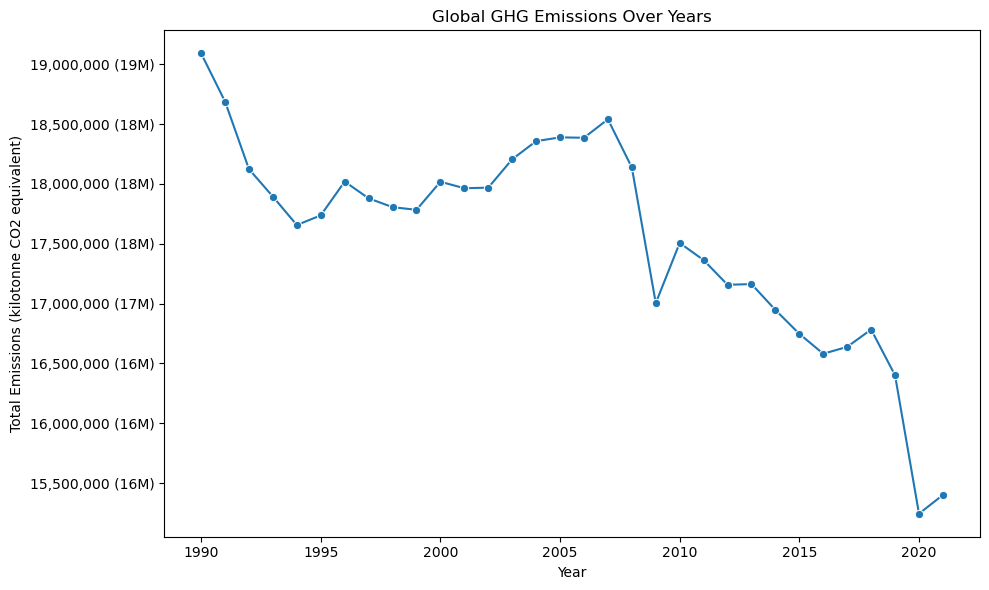

In [ ]:
#Line trend over the year
#Trend over year
global_trend = df_no_eu.groupby('year')['value'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=global_trend, x='year', y='value', marker='o')
plt.title('Global GHG Emissions Over Years')
plt.xlabel('Year')
plt.ylabel('Total Emissions (kilotonne CO2 equivalent)')
formatter = ticker.FuncFormatter(custom_label)
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()


**Line Chart over the year**

In 1990, the volume of greenhouse gas (GHG) emissions for CO2 ultimately peaked at 19 million kilotonnes of CO₂ equivalent (CO₂e), the largest recorded volume in the last few decades. This is because of emissions gradually declining since 1990 due to post-Soviet state economic reorganization and initial climate mitigation in developed nations (Climate Watch, 2023). It wasn't until the mid-2000s that emissions exploded again for a while, but then their own declines offset the total. 

A major decline in emissions occurred in 2009, coinciding with the global financial crisis, which slowed economic activity and energy demand in many parts of the world. According to the International Energy Agency (IEA), global fossil fuel CO2 emissions decreased by approximately 0.4 gigatonnes (Gt) in 2010, owing mostly to reduced industrial activity and usage of fossil fuels (IEA, 2010, pp. 18).

A further significant fall occurred in 2020, when the COVID-19 pandemic resulted in unprecedented lockdowns, which limits on foreign travel, and the greatest reduction in economic activity in recent history. According to Le Quéré et al. (2020), global daily CO₂ emissions decreased by 17% during peak hours in April 2020 compared to the mean levels in 2019. Surface transportation, electricity generation, and industry made the most significant contributions (Le Quéré et al., 2020, p. 647). Finally, these cumulative reductions brought annual global emissions to their lowest levels since the early 2000s.

Between 2020 and 2021, global emissions reached a 30-year low. As the pandemic restricted activity, there was typically a corresponding fall in transportation and heavy industry, providing some insight into the emissions reductions needed to safe and preserve the climate. Unfortunately, most of the reductions were temporary, as emissions immediately rebounded with the recovery of economic activity in 2021 and next.


REFERENCES

Climate Watch (2023)
World Resources Institute. (2023). Climate Watch: Historical GHG Emissions. Retrieved from https://www.climatewatchdata.org/ghg-emissions

Le Quéré et al. (2020)
Le Quéré, C., Jackson, R. B., Jones, M. W., Smith, A. J. P., Abernethy, S., Andrew, R. M., ... & Peters, G. P. (2020). Temporary reduction in daily global CO₂ emissions during the COVID-19 forced confinement. Nature Climate Change, 10(7), 647–653. https://doi.org/10.1038/s41558-020-0797-x

IEA (2010)
International Energy Agency. (2010). CO₂ Emissions from Fuel Combustion 2010. OECD Publishing. Retrieved from https://www.oecd.org/content/dam/oecd/en/publications/reports/2010/10/co2-emissions-from-fuel-combustion-2010_g1g1202d/9789264096134-en.pdf


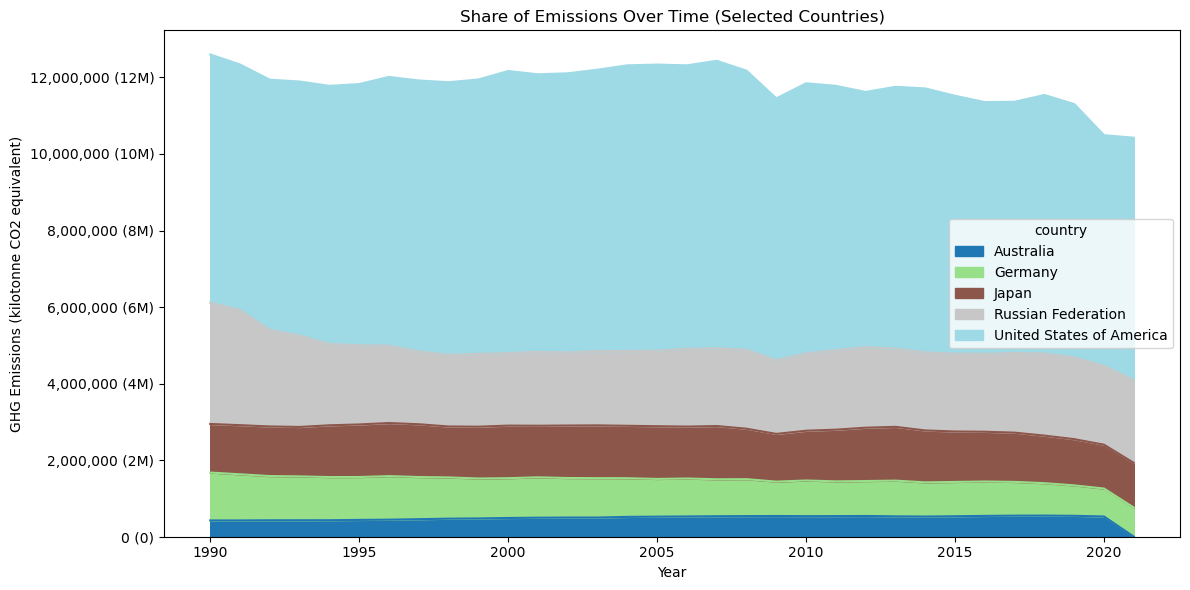

In [28]:
#Area Chart: Share of Emissions Over Time
selected = ['Russian Federation', 'United States of America', 'Japan', 'Germany', 'Australia']
subset = df[df['country'].isin(selected)]

pivot_area = subset.pivot(index='year', columns='country', values='value')

pivot_area.plot.area(figsize=(12, 6), colormap='tab20')
plt.title("Share of Emissions Over Time (Selected Countries)")
plt.ylabel("GHG Emissions (kilotonne CO2 equivalent)")
plt.xlabel("Year")
formatter = ticker.FuncFormatter(custom_label)
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()


**Area Chart of Selected Countries: Share of Emissions Over Time**

The US greenhouse gas (GHG) emissions have been the highest of any country since 1990. In the US, emissions were relatively constant and stable from 1990 to 2015, with one dip in 2009 due to the economic declines that included fuel prices and energy consumption. After 2015, emissions in the US declined slightly, because of a wide variety of reasons that have included closing coal-fired plants, more renewable energy, more efficient standards and regulations and policies that are related to efficiency and renewable such as the Clean Power Plan that even though the Clean Power Plan was not fully implemented still showed an effect(EPA, 2023, p. 8; IEA, 2016, p. 42). The electricity industry has been changing toward natural gas and renewables, and the transitioning has reduced emissions growth while continuing to grow the economy.

Between 1991 and 1995, the Russian Federation's emissions decreased significantly. With the collapse of the Soviet Union, many sectors, particularly those that were energy-intensive, were forced to close due to economic depression, and many fuel-consuming activities ended (UNFCCC, 2007, p. 20). Emissions stabilized in the years after the sharp decrease, although at a much lower level than in the late 1980s and early 1990s. While emissions increased slightly in the 2000s as the economy recovered, emissions remained much lower than pre-1990 levels despite structural changes that allowed for increased energy efficiency (IEA, 2004, p. 76).

After about 2005, Japan's emissions have generally declined. This demonstrates higher energy efficiency and more support for low-carbon technology. The 2011 Fukushima Daiichi nuclear tragedy marked a historic moment. Following the tragedy, Japan idled a large portion of its nuclear fleet, prompting an immediate surge in fossil fuel imports especially oil, and coal to backfill nuclear capacity. This meant that emissions were nearly flat, or slightly growing, from the 2011 accident until 2014, when we saw a resumed decline as Japan gradually integrated renewable energy and restarted a few nuclear units (METI, 2019, p. 12; OECD, 2015, p. 56).

Among high-income and industrialised countries, Germany has achieved significant progress in decreasing a variety of emissions. Germany has been dropping GHG emissions since 1990, albeit with considerable annual predictability, and is well on its path to meeting the 2030 and 2050 emission reduction targets. The Energiewende, which intends to minimize dependency on fossil fuels by encouraging renewable energy and thereby increasing efficiency, explains why many Germans believe the government will phase out fossil fuels (BMWK, 2022, p. 5). These carbon reductions also result from and respond to macroeconomic adjustments caused by reunification, such as the closure of outmoded industries in former East Germany, which helped the early emissions reductions required to meet climate targets.

Australia emits fewer greenhouse gases than other industrialized countries and has a history of relatively stable emissions levels, only growing little over time. The situation in Australia appears to be due, in part, to the country's reliance on fossil fuels in the form of coal for energy generation, combined with a large mining and exporting fossil fuel industry, though some policy initiatives addressing climate change have been implemented, such as a carbon price (2012-2014). The concern about dependency and analysing emissions reductions in countries that rely significantly on extractive industries has made it difficult (Australian Government, 2023, p. 18; IEA, 2018, p. 29).

When we examine individual country emissions patterns and compare them to the line chart of total emission, we can see that the same five industrialized countries which is the United States, the Russian Federation, Japan, Germany except Australia continue to emit a significant amount of annual global greenhouse gases in CO2. The data shows that the five countries emit between 10 and 12 million kt of CO₂e (or CO₂ equivalent) per year. This number clearly represents a portion of the global total of around 55% to 65%, given that global emissions have been between 15 million kt and 19 million kt in the past 30 years (Climate Watch, 2023).

Emissions are concentrated in a few countries due to high levels of economic activity, energy consumption, and development. The United States emits the most of this group, estimated at 6 to 7 million kt CO₂e at the highest level of emissions. Russia and Japan, both large energy exporters, have emit between 1-3 million kt of CO₂e annually. It is also worth noting that Germany and Australia make smaller but still significant contributions, especially in terms of population and development.

The impacts of this concentration are critical to global climate policy. The opportunity to reduce global emissions is mostly dependent on mitigation opportunities in a small number of high emitting countries. The emission trajectories of a few countries have a significant impact on the worldwide trajectory of GHG emissions. If their policy alternatives and energy transition go as planned, they have the financial and technical resources to lead climate action.


REFERENCES

Australian Government. (2023). Australia’s National Greenhouse Accounts: National Inventory Report 2021 (Vol. 1, p. 18). https://www.dcceew.gov.au

BMWK (Federal Ministry for Economic Affairs and Climate Action). (2022). The Energy Transition: Making Germany’s Energiewende a Success (p. 5).

EPA (Environmental Protection Agency). (2023). Inventory of U.S. Greenhouse Gas Emissions and Sinks: 1990–2021 (p. 8). https://www.epa.gov/ghgemissions

IEA. (2004). Russia Energy Survey (p. 76).

IEA. (2016). Energy and Air Pollution: World Energy Outlook Special Report (p. 42).

IEA. (2018). Australia 2018 Review (p. 29).

METI (Ministry of Economy, Trade and Industry, Japan). (2019). Japan’s Energy White Paper (p. 12).

OECD. (2015). OECD Environmental Performance Reviews: Japan 2015 (p. 56).

UNFCCC. (2007). National Communications: Russian Federation (p. 20).

Climate Watch. (2023). Historical GHG Emissions. World Resources Institute. Retrieved from https://www.climatewatchdata.org/



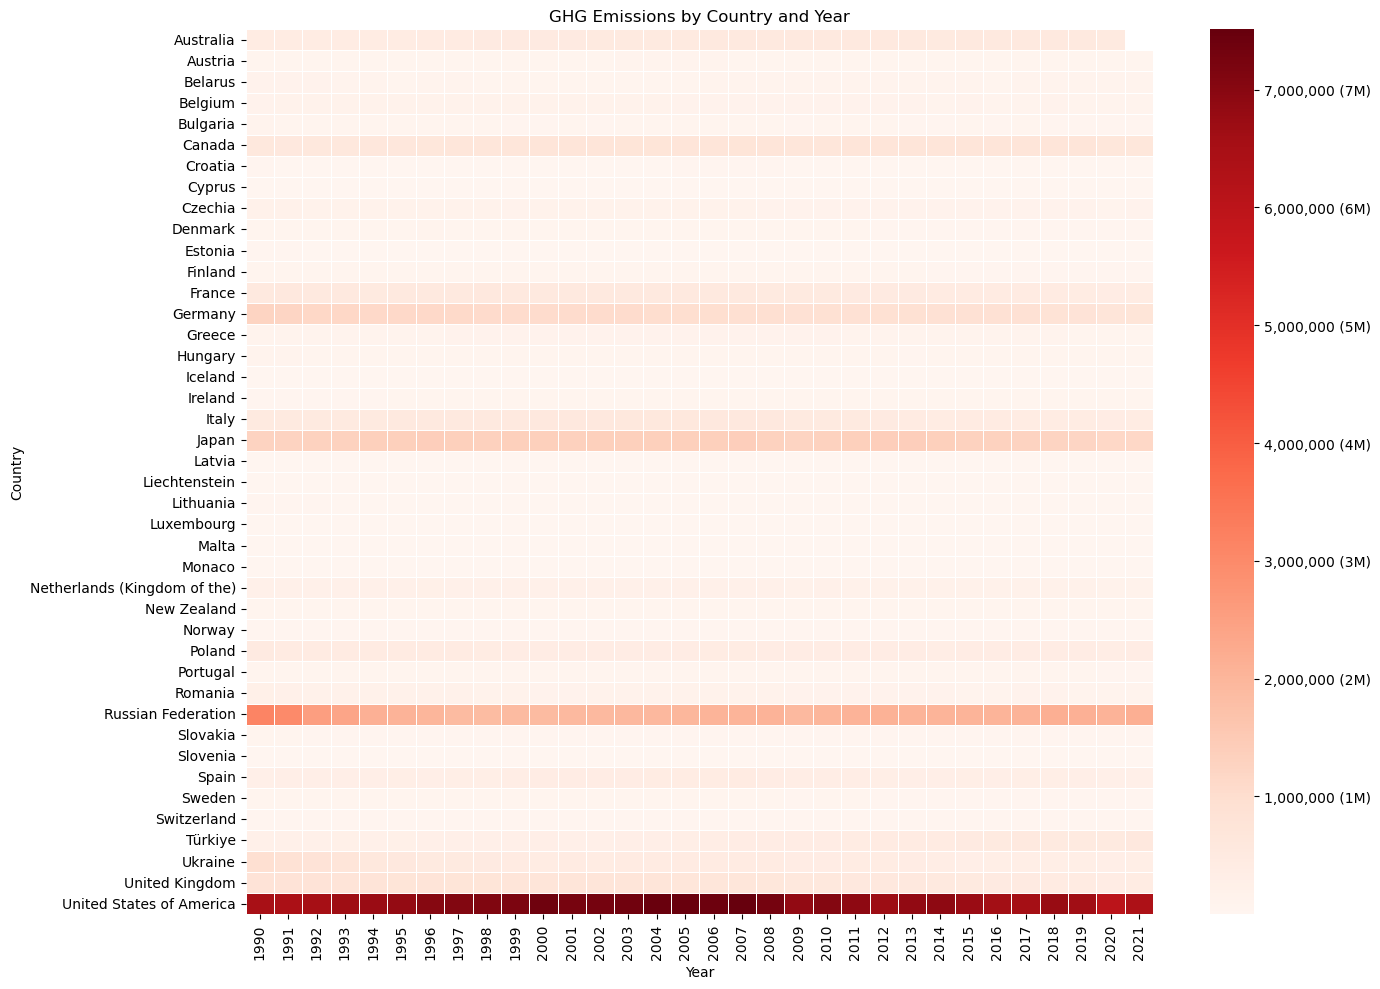

In [34]:
#Heatmap
pivot_df = df_no_eu.pivot(index='country', columns='year', values='value')

# Plot heatmap
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_df, cmap="Reds", linewidths=0.5)

# Apply formatter to colorbar
colorbar = ax.collections[0].colorbar
colorbar.ax.yaxis.set_major_formatter(ticker.FuncFormatter(custom_label))
plt.title("GHG Emissions by Country and Year")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

**Heatmap of GHG Emission**

This heatmap visualizes the annual GHG emissions (kt CO₂ equivalent) across 40+ countries between 1990 and 2021. Each cell’s colour intensity reflects the total emissions for a given year and country, allowing for immediate pattern recognition of emission trends, shifts, and anomalies.

The heatmap demonstrates that the United States retains the highest emissions, as evidenced by the darkest colours. Emission levels from the United States increased in a steady upward trend until the year 2007 where they reached their all time high of 7.4 million kilotonnes CO₂ equivalent. After 2007, emissions began to decline after the 2008 financial crisis and stricter emissions-related regulations (EPA, 2023, p. 12). For Russia, we observe that emissions significantly decreased post-1990 due to the massive decline of Soviet-era industrial emissions and then stabilized after 2000 as its economy recovered (UNFCCC, 2023, p. 87). For Japan we see a gradual upwards trend but an uptick in emissions post-2011, likely due to increasing fossil fuel usage following the 2011 Fukushima nuclear power accident (IEA, 2021, p. 45). Germany has seen consistently declining emissions due to its Energiewende (or energy transition) policy which has achieved approximately a 35% reduction in emissions from 1990 to 2020 (European Environment Agency, 2022, p. 39). Canada and Australia show high consistent emissions, indicating reliable reliance on fossil fuels as the major energy source. In Australia's case, emissions remain mostly flat due to continued coal use (Commonwealth of Australia, 2022, p. 27).

Countries like Ukraine, Romania, and Poland that is from eastern Europe experienced significant declines after 1990, because of the de-escalation of industry and an increased reliance on market liberalization (EEA, 2022, p. 66). The countries from western Europe have shown some lightening patterns, which show considerable renewable energy adoption across Poland, Romania and Ukraine, as well as varying degrees of consistent policy across these countries (EEA, 2022, p. 58). There was much less intensity of colour throughout historical states of Nordic countries, with low GHG profiles due to largely reliance on hydropower, and other clean technologies (IEA, 2020, p. 31). Moderate emission does reflect energy demand with increased demand and expanding economies, including especially Turkey and Spain which is southern Europe (UNFCCC, 2023, p. 134).

The heatmap highlights the concentration of global GHG emissions, with a few countries significantly outpacing others especially in comparison to European countries. The United States, Russia, Canada, Japan, and Germany clearly have the darkest colors across all years, and thus, have the highest levels of GHG emissions. These countries frequently have large industries, high energy demand, and heavy reliance on fossil fuels. While most European countries tended to have lighter colors, indicating a much lower GHG emissions rate. This difference in emissions demonstrates the success of the EU's climate policies and clean power. 

The difference also comes down to population size, types of industries, and energy sources. Countries with high emissions generally have large populations or rely heavily on energy-intensive industries for example Russia and Canada. Conversely, many European countries have made early investments in renewable energy, carbon pricing, and emissions trading that have enabled them to reduce their emissions over time.


REFERENCES

European Environment Agency. (2022). Trends and projections in Europe 2022: Tracking progress towards Europe's climate and energy targets. EEA Report No 14/2022. https://www.eea.europa.eu/publications/trends-and-projections-in-europe-2022

U.S. Environmental Protection Agency. (2023). Inventory of U.S. Greenhouse Gas Emissions and Sinks: 1990–2021. https://www.epa.gov/ghgemissions/inventory-us-greenhouse-gas-emissions-and-sinks

UNFCCC. (2023). National Inventory Submissions 2023: Annex I Countries. https://unfccc.int/ghg-inventories-annex-i-parties/2023

International Energy Agency. (2021). Japan 2021: Energy Policy Review. https://www.iea.org/reports/japan-2021

Department of Industry, Science, Energy and Resources (DISER). (2022). Australia’s emissions projections 2022. Commonwealth of Australia. https://www.dcceew.gov.au

International Energy Agency. (2020). Nordic Energy Technology Perspectives 2020. https://www.iea.org/reports/nordic-energy-technology-perspectives


***5.0 Conclusion***

Globally, greenhouse gas (GHG) emissions have steadily decreased over the period from 1990 to 2021, with only abrupt, sharp reductions due to singular crises, such as the 2009 global financial slowdown, and the pandemic caused by COVID-19. Some industrialized countries, in particular the United States, Russia, and Germany, have reduced GHG emissions through energy transitions, technological advancements, and economic restructuring. However, most of the global progress has been made reactively rather than strategically.

More must be done to decarbonize energy use, particularly in energy intensive industries like manufacturing, electricity generation, and transportation. This would necessitate a large increase in the use of renewable energy, the electrification of transportation networks, the phase-out of coal, as well as investments in carbon capture and hydrogen generation (IEA, 2021).

It is critical to monitor absolute and per capita emissions. Emerging economies have a rapidly increasing carbon footprint per capita, but developed countries have a significant absolute emissions footprint. As we create international frameworks, such as the Paris Agreement, equitable global climate governance will necessitate a fair and equitable response to emissions (UNFCCC, 2015).

Climate action calls for the next stage of the revolution from incremental change to structural changes. Structural change can include energy systems, urban form, fiscal levers, and supply and demand in the marketplace. Climate policy must be anticipatory and mainstreamed to embed climate into all elements of governance, from taxes to trade to education, to respond to the disruptive forces requiring a structural transformation.


REFERENCES

IEA. (2021). Net Zero by 2050: A Roadmap for the Global Energy Sector.

UNFCCC. (2015). The Paris Agreement.